## Telco Customer Churn Prediction
## Cohort Analysis & Customer Churn Predictions (using Tree Methods)
### GOAL: This project is to create a model to predict whether or not a customer will Churn 

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
# the data
df = pd.read_csv('..\data\Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick check data

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# merubah type object menjadi float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [7]:
# percentage null value
round(100 *df.isnull().sum() / len(df),2)

customerID          0.00
gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [8]:
# hapus null value
df = df.dropna()

In [9]:
# membagi 2 data berdasarkan type datanya
numeric_columns = df.select_dtypes(exclude='object')
categoric_columns = df.select_dtypes(include='object')

In [10]:
numeric_columns.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [11]:
categoric_columns.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [13]:
# mengapus kolom customerID
df = df.drop('customerID', axis= 1)

In [14]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Part 2. Exploratory Data Analysis

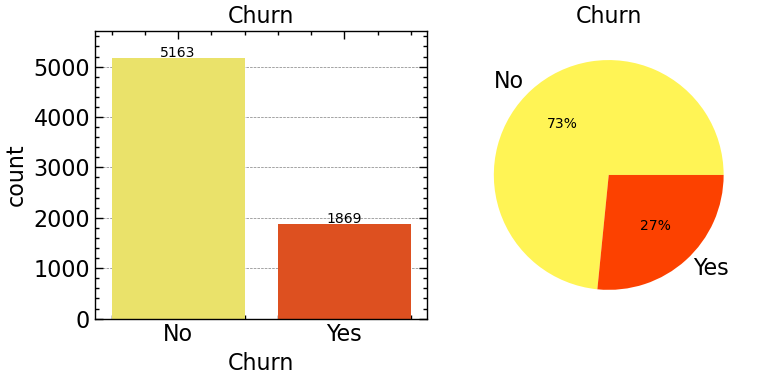

In [15]:
plt.style.use(['science','notebook','grid'])

variable = 'Churn'

plt.figure(figsize=(8,4), dpi=100)
plt.subplot(1,2,1)

ax = sns.countplot(x=variable, data= df, palette= ['#FFF455', '#FC4100'])

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 30, 
            s = '{:.0f}'.format(height),
            ha = 'center'
           )
plt.title(variable)
plt.ylim(0,5700)

# pie cart
plt.subplot(1,2,2)

counts = df[variable].value_counts()
colors = sns.color_palette(['#FFF455', '#FC4100'])
plt.pie(counts, labels = counts.index, colors=colors, autopct='%0.0f%%')
plt.title(variable)


plt.tight_layout()
plt.show()


---------
Dari gambar diatas bahwa Data kita memiliki Unbalance yaitu untuk `Churn = Yes` sebesar 27% dan untuk `Churn = No` sebesar 73%

----

## Distribusi TotalCharges terhadap Churn

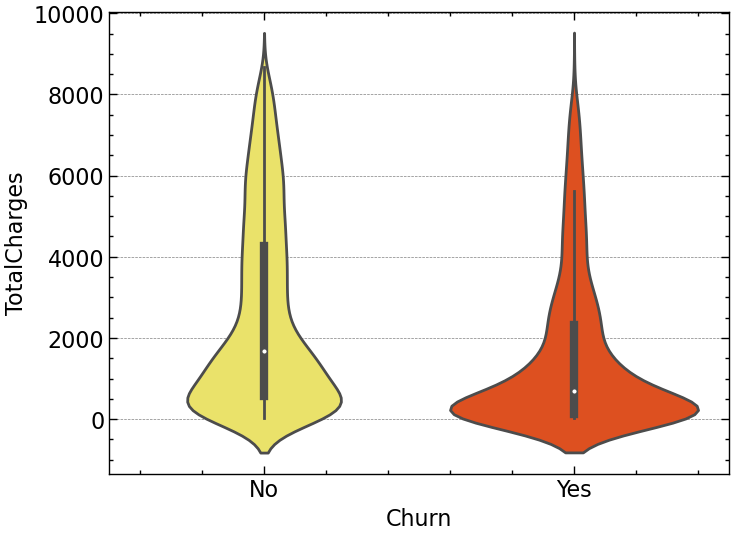

In [16]:
sns.violinplot(x='Churn', y = 'TotalCharges', data= df, palette= ['#FFF455', '#FC4100']);

----
Dapat dilihat `Churn = Yes` memiliki nilai Media yang rendah. Wajar saja karena pelanggan baru cenderung melakukan Churn mengakibatkan nilai Mediannya cenderung rendah dibandingkan dengan pelanggan baru.

----

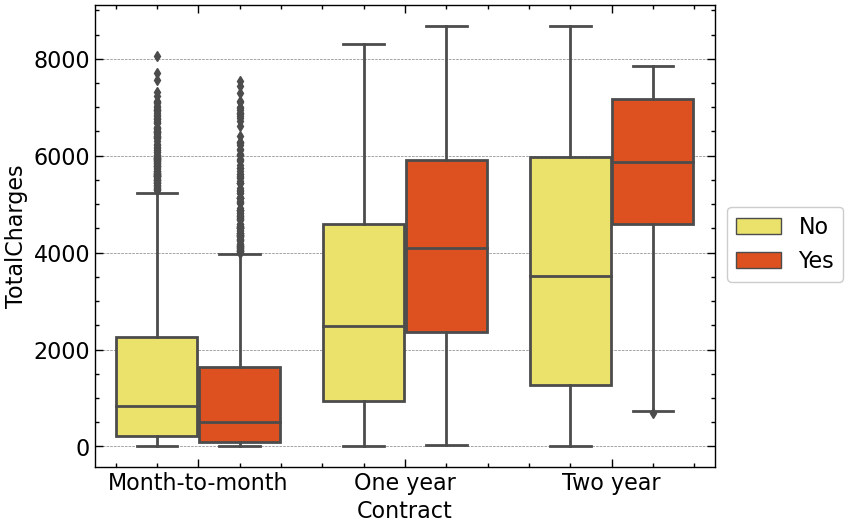

In [17]:
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn', data= df, palette=['#FFF455','#FC4100'])
plt.legend(loc=(1.02, 0.4));

Hasil pengamatan box plot diatas

* Jenis contract `Month-to-month` cenderung memiliki `TotalCharges` yang rendah.tetapi ada banyak outlier yang sangat tinggi terhadap `TotalCharges` melebihi nilai Median pada contract lainnya. Artinya ada beberapa orang memilih jenis contract `Month-to-month` walau pembayarannya dikenakan tarif tinggi.

* Contract `One year dan Two year` memiliki total tagihan yang tinggi dibanding kelompok lain. Pelanggan cenderung melakukan churn karena total tagihan tinggi mengakibatkan pelanggan beralih yang lebih murah dan melakukan churn setelah contract meraka berakhir. 

* Selain itu orang-orang yang mempunyai total tagihan tinggi akan beralih ke contract yang lebih murah, mengakibatkan pelanggan akan melakukan churn cenderung lebih banyak pada contract `One year dan Two year`

Untuk mengatasi customer churn ada beberapa strategi pelayanan untuk para pelanggan yang mempunyai contrack `One year dan Two year`seperti memberi potongan harga atau vocer setelah melewati contract 1 tahun dan 2 tahun dengan begitu perusahaan akan mendapatkan loyalitas dari pelanggan sehingga pelanggan merasa nyaman untuk tidak beralih, lebih baik mempertahankan pelanggan dengan contract yang jauh lebih lama ketimbang membebani pelanggan dengan tarif yang mahal.

----
----

## Correlation between features and Churn label

In [18]:
categoric_columns.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [19]:
features = df[['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

features_dummies =  pd.get_dummies(features)

In [20]:
features_dummies.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1


In [21]:
corr_features = features_dummies.corr()

In [22]:
corr_features['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
StreamingTV_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
StreamingMovies_No internet service       -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
DeviceProtection_No internet service      -0.227578
TechSupport_No internet service           -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [23]:
df_corr_features = corr_features['Churn_Yes'].sort_values()[1:-1]
df_corr_features

Contract_Two year                         -0.301552
StreamingTV_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
StreamingMovies_No internet service       -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
DeviceProtection_No internet service      -0.227578
TechSupport_No internet service           -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

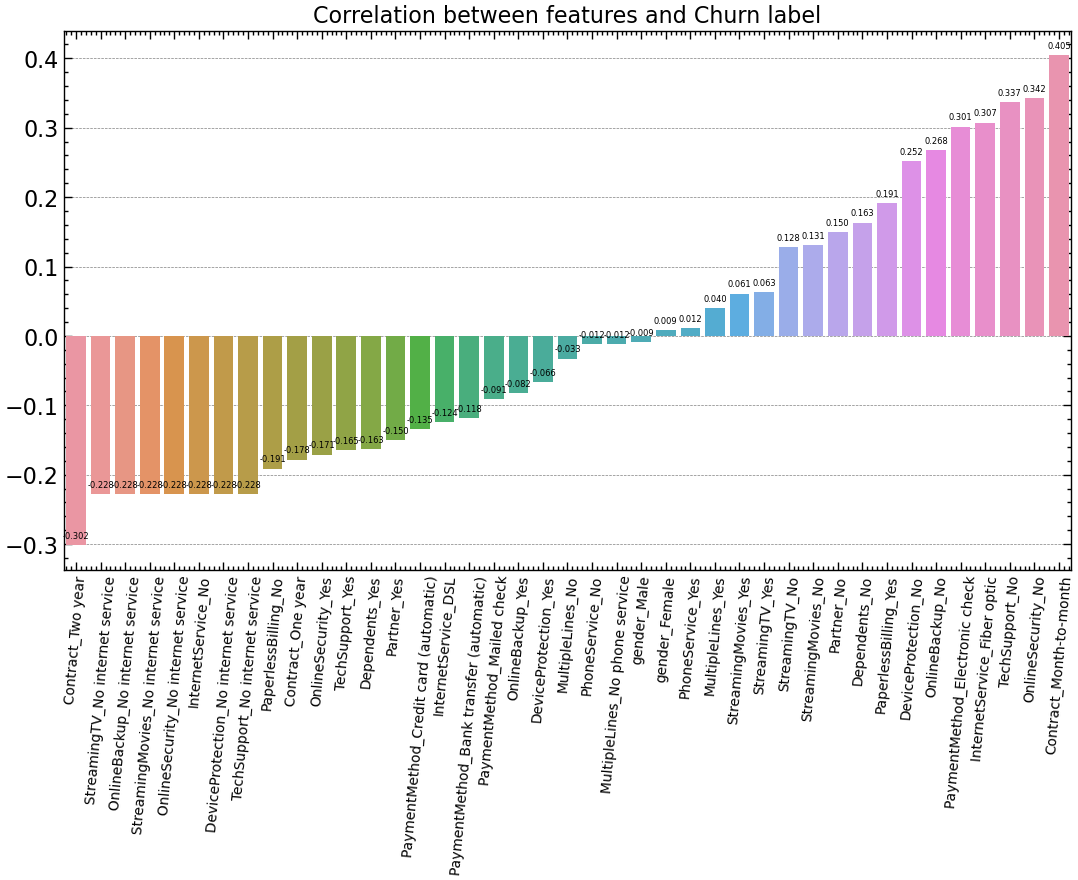

In [24]:
plt.figure(figsize= (13, 7), dpi=100)
ax = sns.barplot(x=df_corr_features.index, y=df_corr_features.values)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 0.01 ,
            s = '{:.3f}'.format(height),
            ha = 'center',
            size = 6           
           )
plt.title('Correlation between features and Churn label')
plt.xticks(rotation= 85, size=10)
plt.show()

Nilai correlasi `Contract_Month-to-month` terhadap `Churn` sangat tinggi mungkin contrack perbulan sangat mudah untuk beralih
sedangkan `Contract_Two year` sangat rendah di karenakan mungkin pelanggan tidak mungkin memutuskan kontrak di tengah - tengah perjanjian.

## Part 3. Churn Analysis

In [25]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

`tenure`: the amount of months a customer was or has been on a customer.

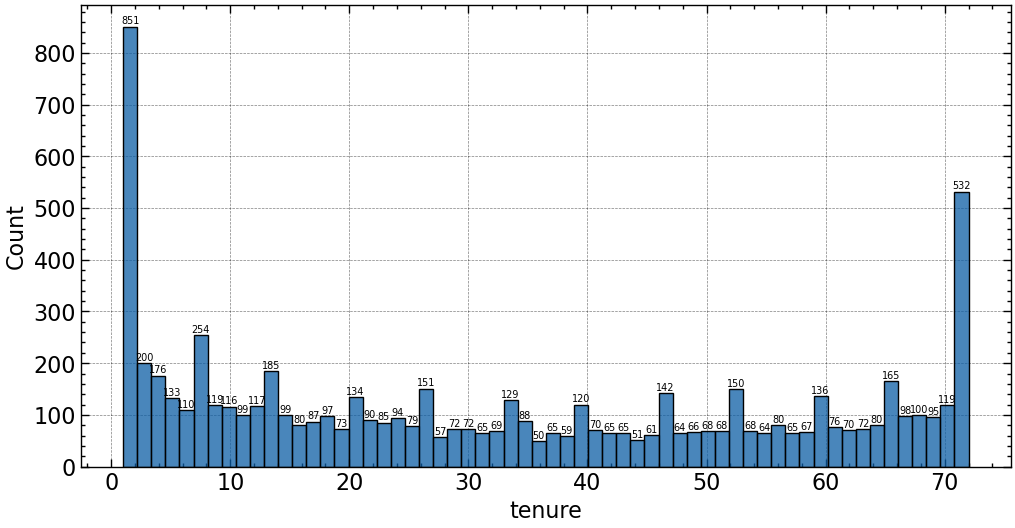

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(x='tenure',bins= 60, data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height +5 ,
            s = '{:.0f}'.format(height),
            ha = 'center',
            size= 7                      
           )
plt.show()

Terdapat jumlah pelanggan yang sangat tinggi sebesar 624 dengan jangka waktu yang sangat singkat, mungkin pelanggan tersebut yang memiliki kontrak perbulan sehingga churn terjadi ketika contrak berkahir, sedangkan `Tenure` 70 memiliki nilai yang tinggi pula sebesar 523 pelanggan kemungkinan ini adalah kelompok meraka yang mempunyai kontrak 1 tahun dan 2 tahun, mungkin dikarenakan butuh atas pelayanannya atau memang enggan untuk berpindah

------

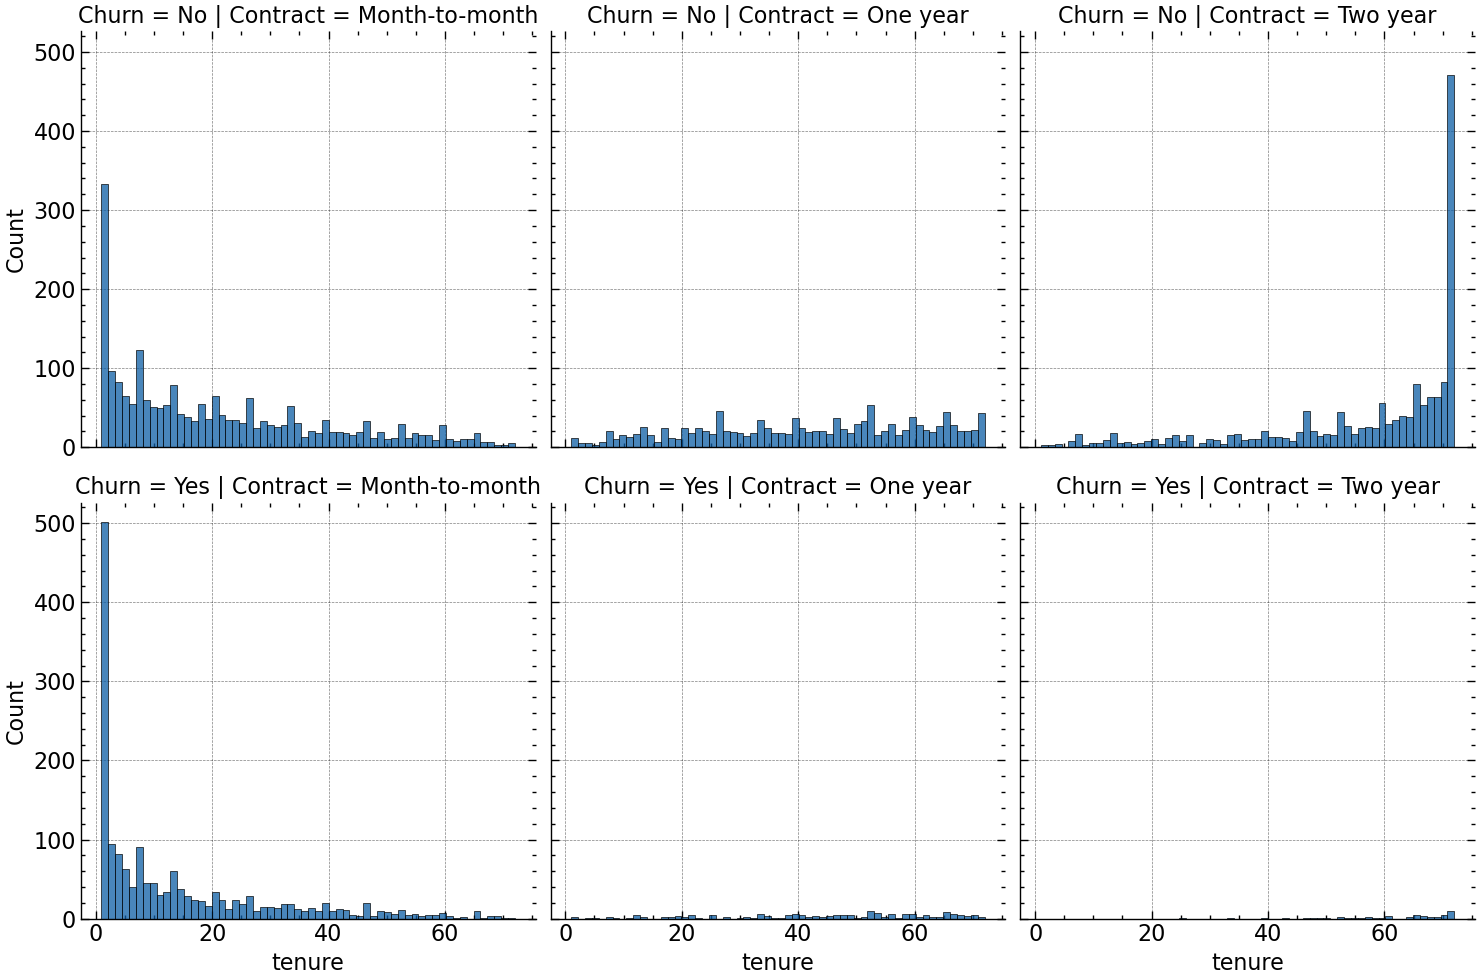

In [27]:
sns.displot(x='tenure', col='Contract', row='Churn',bins=60, data=df);

**Contract Month-to-month**

* Dapat kita lihat bahwa pelanggan dengan `Contract Month-to-month` cenderung melakukan `Churn` lebih tinggi, namun di sisi lain
`Contract Month-to-month` ada pelanggan yang tidak melakukan `Churn` yang saling mendekati atau hampir sama. pelanggan yang memiliki kontrak di atas 50 bulan keatas cenderung tidak melakukan `Churn`

* Walaupun selisihnya cenderung mendekati atau hampir sama. kita sebagai perusahaan bagaimana cara menjaga agar para pelanggan dengan `Contract Month-to-month` tidak melakukan `Churn` tetap loyar terhadap suatu layanan.

* Tidak dipungkiri `TotalCharges` yang tinggi mempengaruhui pelanggan melakukan `Churn` dan mencari celah untuk medapatkan tagihan yang rendah
    
**Contract One year - Two year**

* `Contract One year` tampak landai dan memang sedikit melakukan `Churn` dikarenakan terikatan dengan kontrak itu sendiri yang jarang sekali melakukan tindakan pelanggaran kontrak

* `Contract Two year` ini merupakan sebuah fenomena dimana pelanggan dengan angka 50 bulan keatas sangat loyal dan trennya cenderung meningkat atau memang pelanggan sangat membutukan suatu pelayanannya atau enggan berpaling, dan untuk `Contract One year - Two year` tidak peru di risaukan untuk melakukan `Churn`

## Total Charges vs Monthly Charges

In [28]:
numeric_columns.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

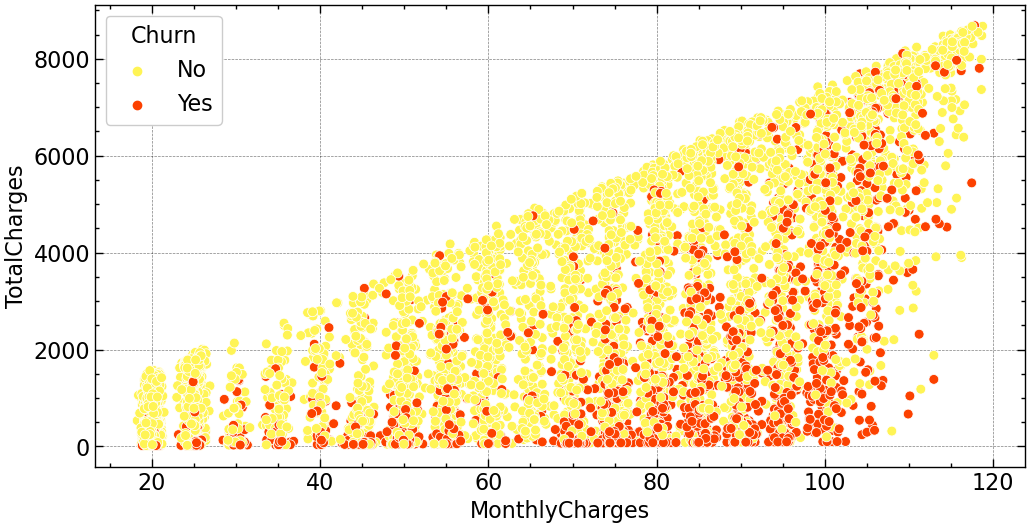

In [29]:
plt.figure(figsize=(12, 6), dpi=100)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df, palette=['#FFF455', '#FC4100'], s=50);


Dari hasil pengamatan pelanggan yang mengeluarakan biaya tinggi perbulan `MonthlyCharges` dan `TotalCharges` total mengeluarakan tinggi pula cenderung melakukan `Churn`

--------
## Cohorts based on Tenures
kita akan mulai dengan memperlakukan setiap jangka waktu kepemilikan yang unik, 1 bulan, 2 bulan, 3 bulan...N bulan sebagai kelompoknya sendiri.

Perlakukan setiap kelompok kepemilikan unik sebagai sebuah kelompok, hitung tingkat Churn (persentase yang memiliki Ya Churn) per kelompok. Misalnya, kelompok yang memiliki masa kerja 1 bulan seharusnya memiliki tingkat Churn sebesar 61,99%. Anda harus memiliki kelompok 1-72 bulan dengan tren umum semakin lama masa kerja kelompok, semakin rendah tingkat churn. Hal ini masuk akal karena kecil kemungkinan Anda akan menghentikan layanan jika sudah lama menggunakannya.

In [30]:
unique_tenure= sorted(df['tenure'].unique())
unique_tenure[:5], unique_tenure[-5:]

([1, 2, 3, 4, 5], [68, 69, 70, 71, 72])

In [31]:
def get_churnrate_for_tenure():
    churns = []
    for n in range(1, df['tenure'].max() + 1):
        yes_churn = len(df[(df['tenure'] == n) & (df['Churn'] == 'Yes')])
        no_churn = len(df[(df['tenure'] == n) & (df['Churn'] == 'No')])
        total_churn = (yes_churn / (yes_churn + no_churn)) * 100
        churns.append(total_churn)
    return churns
    

In [32]:
print(get_churnrate_for_tenure())

[61.99021207177814, 51.68067226890757, 47.0, 47.159090909090914, 48.1203007518797, 36.36363636363637, 38.93129770992366, 34.146341463414636, 38.655462184873954, 38.793103448275865, 31.313131313131315, 32.47863247863248, 34.862385321100916, 31.57894736842105, 37.37373737373738, 35.0, 29.88505747126437, 24.742268041237114, 26.027397260273972, 25.352112676056336, 26.984126984126984, 30.0, 15.294117647058824, 24.46808510638298, 29.11392405063291, 18.9873417721519, 18.055555555555554, 21.052631578947366, 20.833333333333336, 22.22222222222222, 24.615384615384617, 27.536231884057973, 21.875, 18.461538461538463, 17.045454545454543, 20.0, 23.076923076923077, 22.033898305084744, 25.0, 20.3125, 20.0, 21.53846153846154, 23.076923076923077, 11.76470588235294, 9.836065573770492, 16.216216216216218, 20.588235294117645, 14.0625, 22.727272727272727, 14.705882352941178, 11.76470588235294, 10.0, 20.0, 19.11764705882353, 14.0625, 12.5, 12.307692307692308, 16.417910447761194, 13.333333333333334, 7.89473684

In [33]:
tenures = pd.Series(index = range(1, 73), data= get_churnrate_for_tenure())

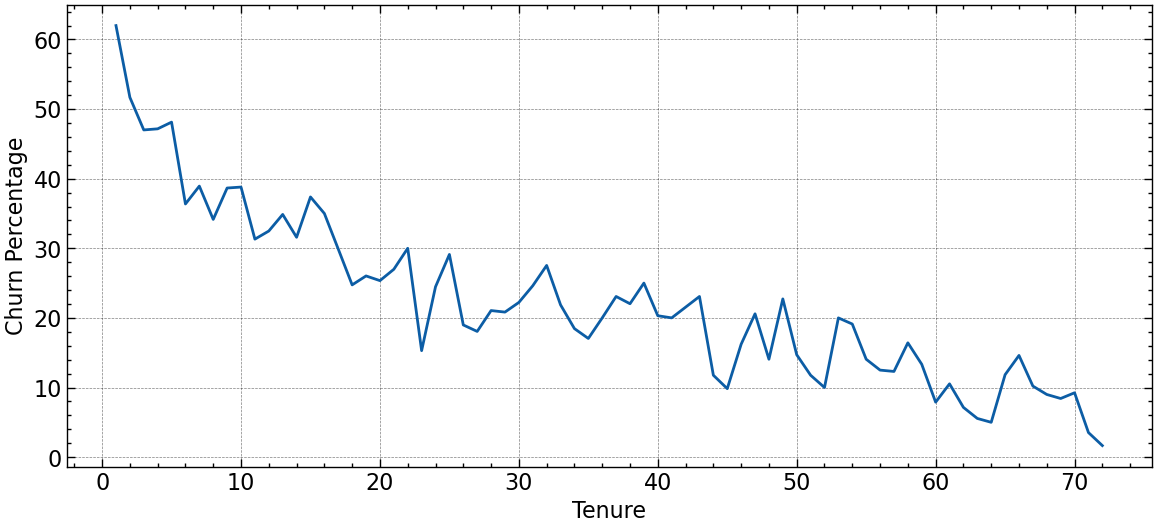

In [34]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=tenures.index, y=tenures.values)
plt.xlabel('Tenure')
plt.ylabel('Churn Percentage');

Semakin lama masa pelanggan `Tenure`, pelanggan cenderung akan lebih lama menggunakan layanan tersebut.

terlihat dari persentase churn yang semakin tinggi

## Broder Cohort Groups
Based on the tenure column values, will create a new column called Tenure Cohort that creates 4 separate categories:

* '0-12 Months'
* '12-24 Months'
* '24-48 Months'
* 'Over 48 Months'

In [35]:
def get_cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    if tenure < 24:
        return '12-24 Months'
    if tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 49 Month'

In [36]:
df['Tenure cohort'] = df['tenure'].apply(get_cohort)

In [37]:
df[['tenure','Tenure cohort']].head()

,tenure,Tenure cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


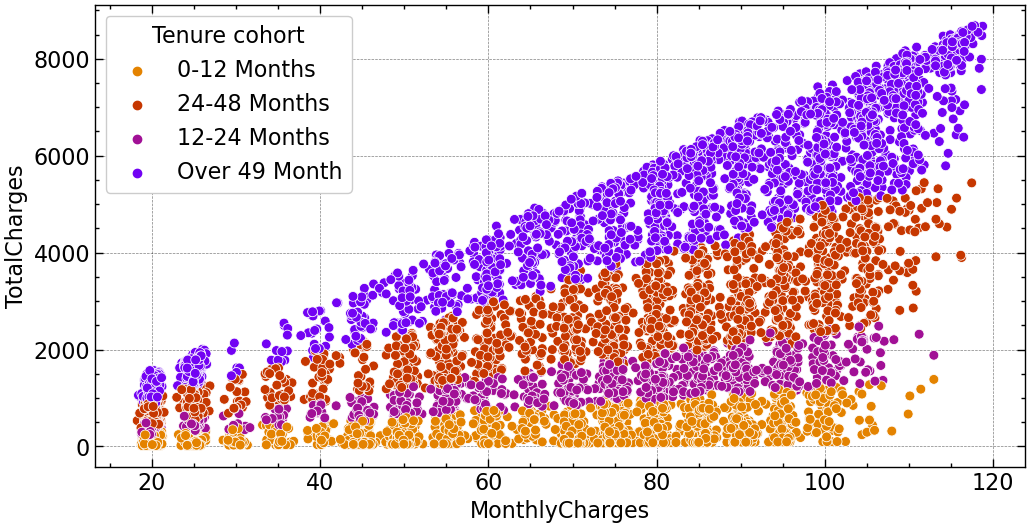

In [38]:
plt.figure(figsize=(12, 6), dpi=100)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Tenure cohort', data=df,palette='gnuplot_r', s=50);

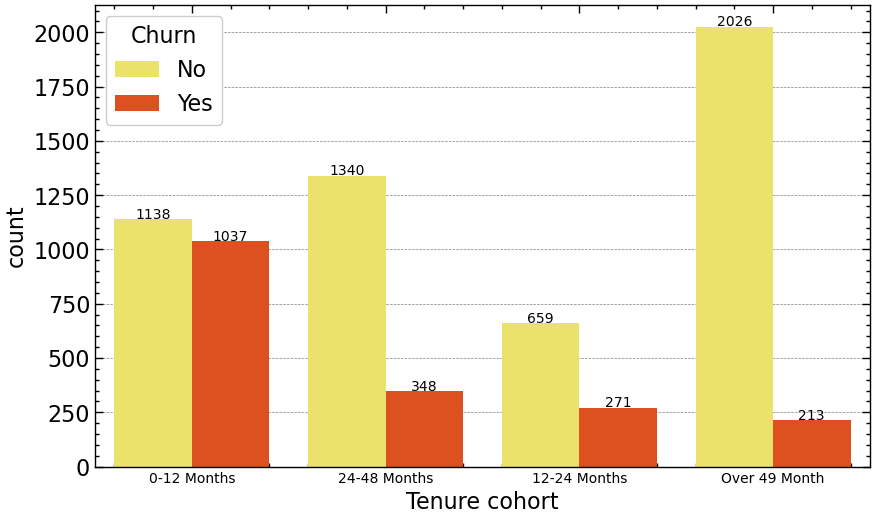

In [39]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Tenure cohort', hue='Churn', data= df, palette=['#FFF455','#FC4100'] )
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height+4, 
            s = '{:.0f}'.format(height),
            ha = 'center'
           )
plt.xticks(size= 10)
plt.show()

In [40]:
plt.style.use('default')

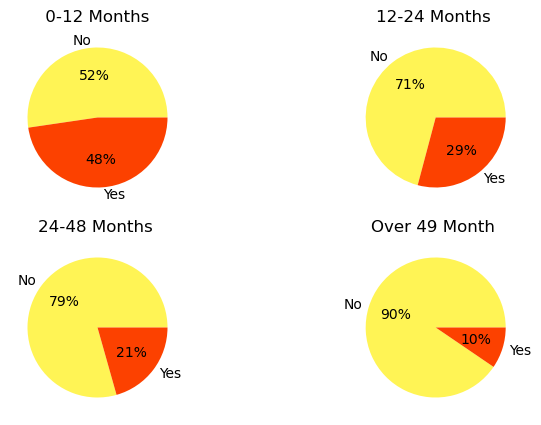

In [41]:
plt.figure(figsize=(8,5), dpi=100)
plt.subplot(2,2,1)
tenure_012 = df[df['Tenure cohort']=='0-12 Months']
counts = tenure_012['Churn'].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.0f%%', colors = sns.color_palette(['#FFF455','#FC4100']))
plt.title(' 0-12 Months ')

plt.subplot(2,2,2)
tenure_24 = df[df['Tenure cohort']=='12-24 Months']
counts = tenure_24['Churn'].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.0f%%', colors = sns.color_palette(['#FFF455','#FC4100']))
plt.title('12-24 Months ')

plt.subplot(2,2,3)
tenure_48 = df[df['Tenure cohort']=='24-48 Months']
counts = tenure_48['Churn'].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.0f%%', colors = sns.color_palette(['#FFF455','#FC4100']))
plt.title('24-48 Months ')

plt.subplot(2,2,4)
tenure_49 = df[df['Tenure cohort']=='Over 49 Month']
counts = tenure_49['Churn'].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.0f%%', colors = sns.color_palette(['#FFF455','#FC4100']))
plt.title('Over 49 Month ')

plt.show()

In [42]:
df['Tenure cohort'].unique()

array(['0-12 Months', '24-48 Months', '12-24 Months', 'Over 49 Month'],
      dtype=object)

Kita rangkum 2 gambar diatas yang sama, disederhanayakn menjadi persentase

* `0-12 Months` mempunyai tingkat `Churn` yang hampir mendekati yaitu `Churn = Yes sebesar 47%` dan `Churn = No sebesar 53%` seharusnya yang menjadi pusat perhatian perusahaan bagaimana jumlahnya itu hampir sebanding
*  contract `12-24 Months` mempunyai `Churn = Yes sebesar 29%` juga butuh perhatian agar `Chrun = No sebesar 71%` tidak beralih
* yang terakhir contart `24-48 Months` dan `Over 49 Month` tidak perlu di khawatirkan karena nilai `Churn = No` sangat memuaskan hanya butuh perhatian sedikit saja

<Figure size 1200x500 with 0 Axes>

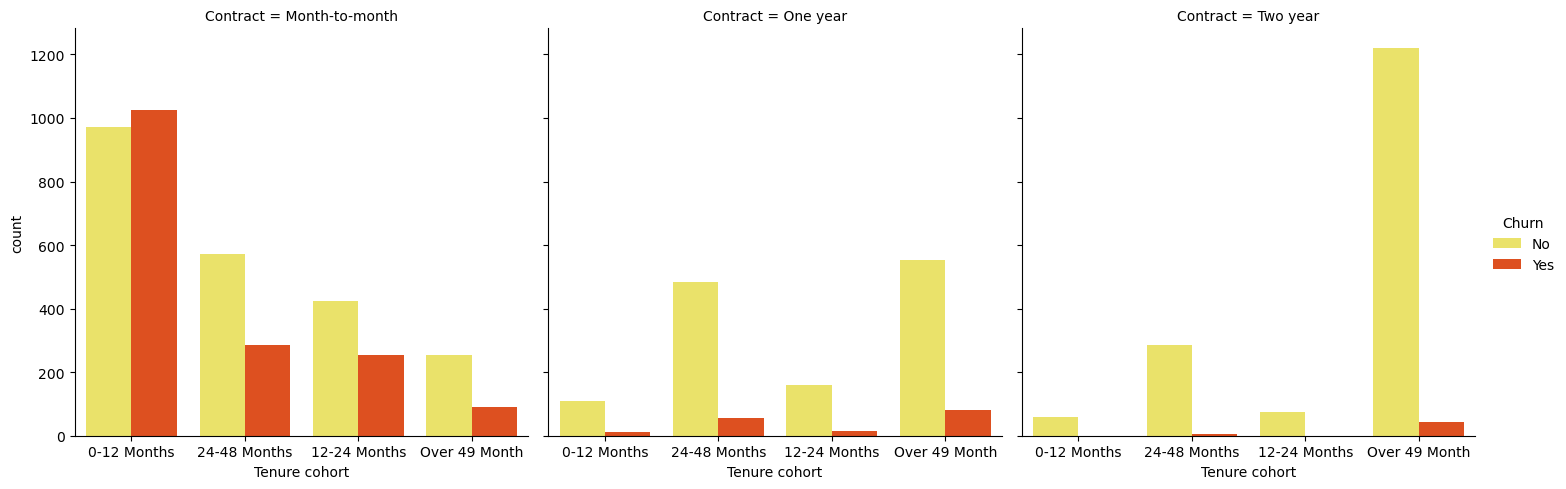

In [43]:
plt.figure(figsize=(12, 5))
sns.catplot(x= 'Tenure cohort', hue='Churn', col ='Contract',kind='count', data=df, palette=['#FFF455','#FC4100'])
plt.xticks(size= 10)
plt.show()

Dapat kita lihat pada dasarnya sama aja hasilnya dengan gambar yang sebelumnya
* Contract `0-12 Months` untuk jumlah `Churn = Yes` selisihnya mendekati dengan `Churn = No` hal wajar prilaku pelanggan baru melakukan `Churn` karena masih mencari dan mencoba-coba pada sebuah pelayanan yang cocok untuk dirinya
* Contract `24-48 Months, 12-24 Months, Over 49 Month` butuh pelayan yang lebih dan dberikan kemudahan agar tetep loyal

## Part 4. Predictive Model

**We will explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**

## Create X and y

In [44]:
X = df.drop('Churn', axis= 1)
X = pd.get_dummies(X, drop_first= True)
y = df['Churn']

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 101)

## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [49]:
model = DecisionTreeClassifier()

In [50]:
param_grid = {'criterion' :['gini','entropy'], 
              'max_depth' :[2,3,4,5,6], 
              'max_features' :['auto','sqrt','log2']
              }

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid = GridSearchCV(model, param_grid)

In [53]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [54]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features='auto')

In [55]:
preds = grid.predict(X_test)

## Evaluation Metrics

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [57]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.87      0.87       557
         Yes       0.50      0.48      0.49       147

    accuracy                           0.79       704
   macro avg       0.68      0.68      0.68       704
weighted avg       0.79      0.79      0.79       704



In [58]:
confusion_matrix(y_test, preds)

array([[485,  72],
       [ 76,  71]], dtype=int64)

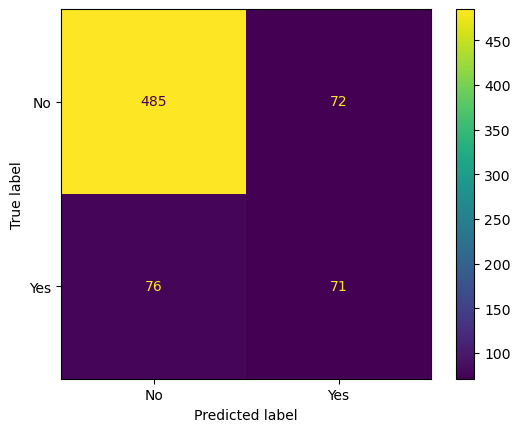

In [59]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test);

In [60]:
# feature importances
grid.best_estimator_.feature_importances_

array([6.02406533e-04, 1.06084044e-01, 2.94698072e-03, 1.07999426e-01,
       1.36536303e-03, 0.00000000e+00, 1.56692996e-05, 3.82341612e-03,
       2.45273614e-03, 2.90947789e-03, 3.18798269e-01, 0.00000000e+00,
       0.00000000e+00, 7.16192969e-03, 0.00000000e+00, 8.52851222e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.94738991e-03,
       5.65859790e-03, 1.37035644e-02, 2.35997232e-02, 5.36297871e-04,
       1.66613120e-01, 1.60431857e-01, 0.00000000e+00, 2.96235753e-04,
       6.33530560e-02, 1.71926138e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [61]:
feat_imp = pd.DataFrame(data= grid.best_estimator_.feature_importances_, index=X.columns, columns=['Importances'])

In [62]:
feat_imp_sort = feat_imp.sort_values('Importances')
feat_imp_sort

,Importances
DeviceProtection_No internet service,0.000000
Tenure cohort_12-24 Months,0.000000
PaperlessBilling_Yes,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000
Tenure cohort_24-48 Months,0.000000
OnlineBackup_No internet service,0.000000
OnlineSecurity_No internet service,0.000000
InternetService_No,0.000000
Tenure cohort_Over 49 Month,0.000000


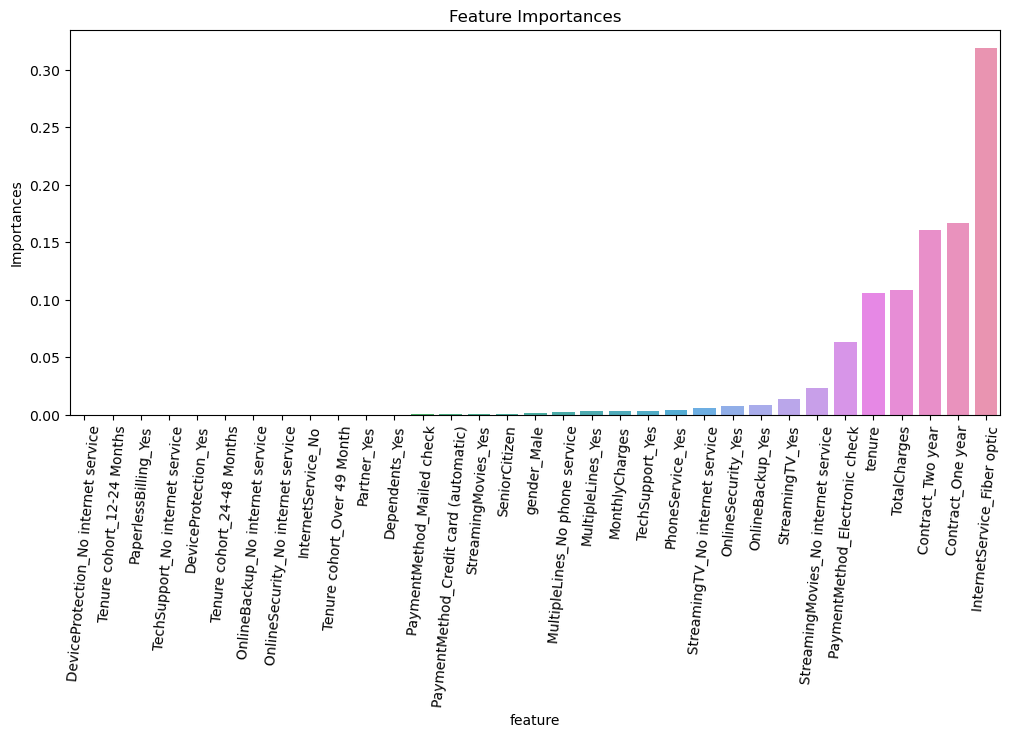

In [63]:
plt.figure(figsize=(12, 5), dpi=100)
sns.barplot(x=feat_imp_sort.index,y ='Importances', data=feat_imp_sort)
plt.title('Feature Importances')
plt.xlabel('feature')
plt.ylabel('Importances')
plt.xticks(rotation = 85, size=10)
plt.show()

In [64]:
from sklearn.tree import plot_tree

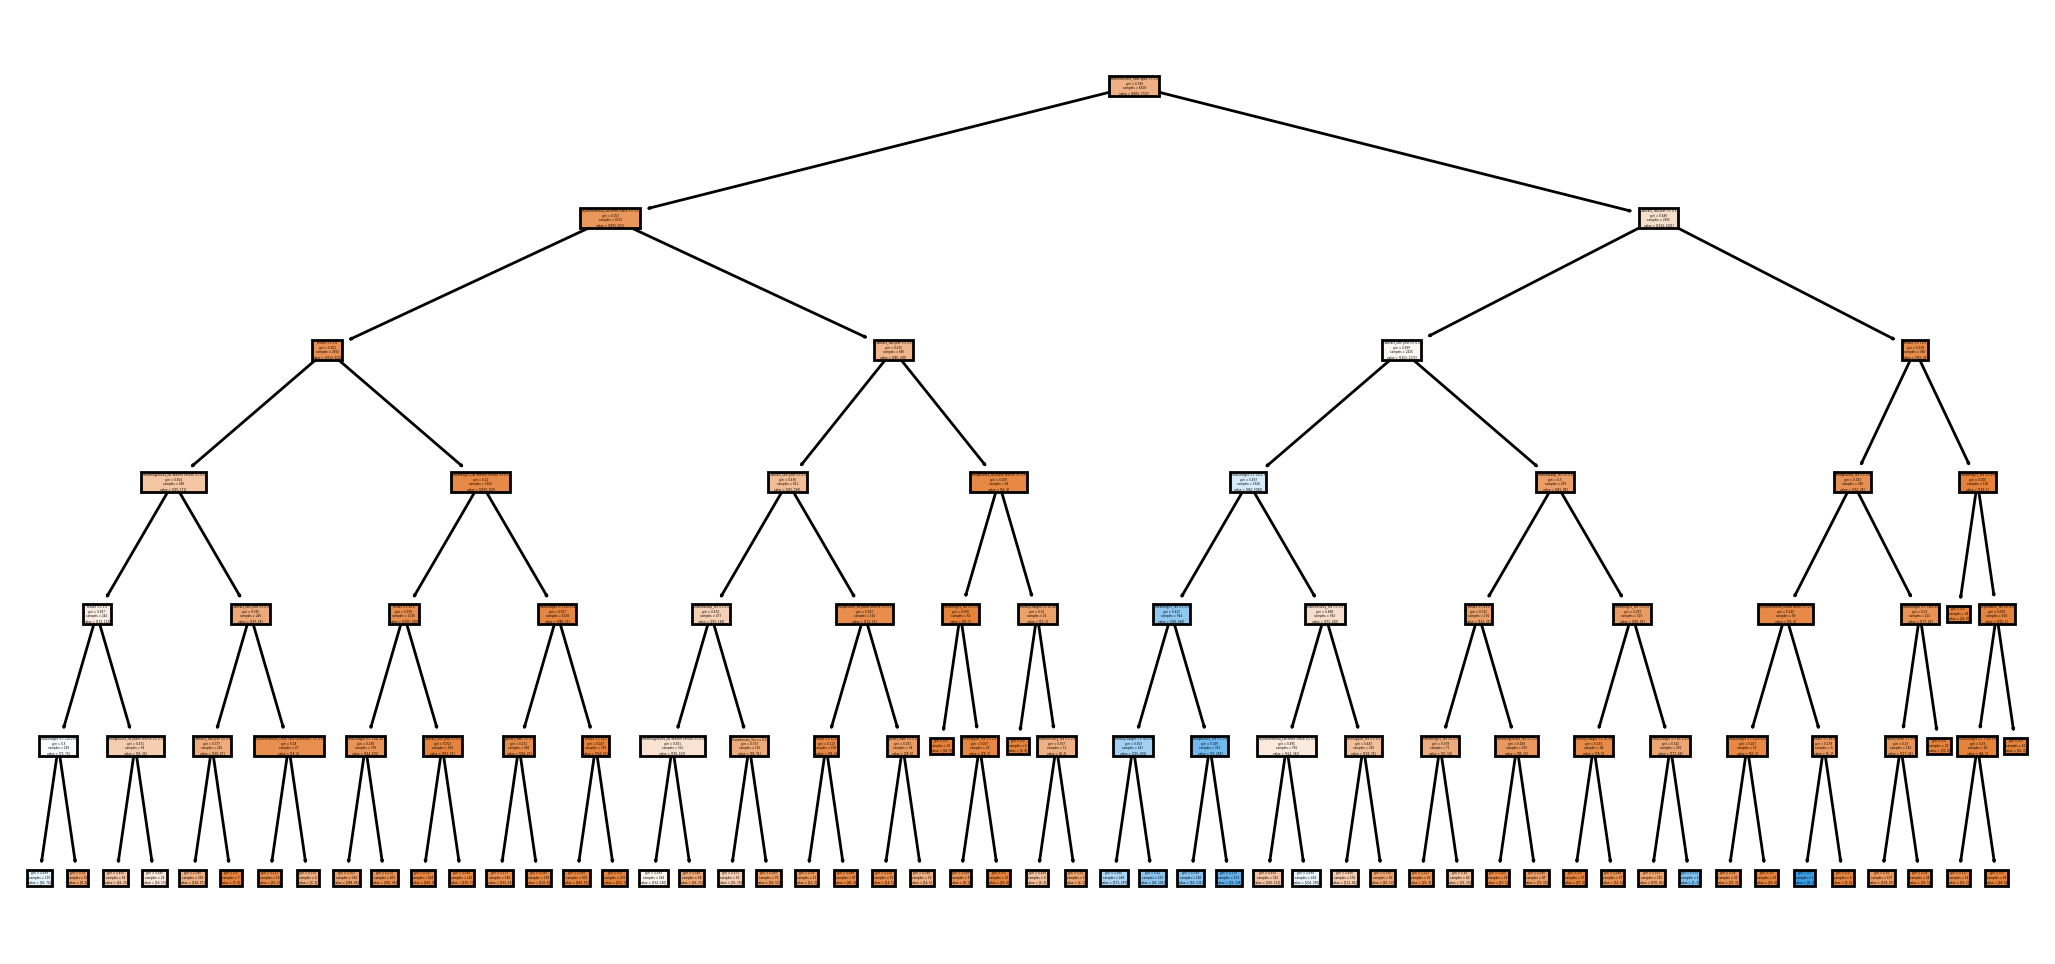

In [65]:
plt.figure(figsize=(13, 6), dpi=200)
plot_tree(grid.best_estimator_, feature_names = X.columns, filled= True);

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [68]:
model = RandomForestClassifier()

In [69]:
param_grid = {'n_estimators' :[10,20,30,40,50,100],
              'max_depth' : [1,2,3,4,5,6,'auto'],
              'max_features' :[2,3,4]}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid = GridSearchCV(model, param_grid)

In [72]:
grid.fit(X_train, y_train)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ibrahim\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ibrahim\anaconda3\lib\site-

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 'auto'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 30, 40, 50, 100]})

In [73]:
grid.best_estimator_

RandomForestClassifier(max_depth=6, max_features=4)

In [74]:
preds = grid.predict(X_test)

In [75]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.62      0.41      0.50       147

    accuracy                           0.82       704
   macro avg       0.74      0.67      0.69       704
weighted avg       0.81      0.82      0.81       704



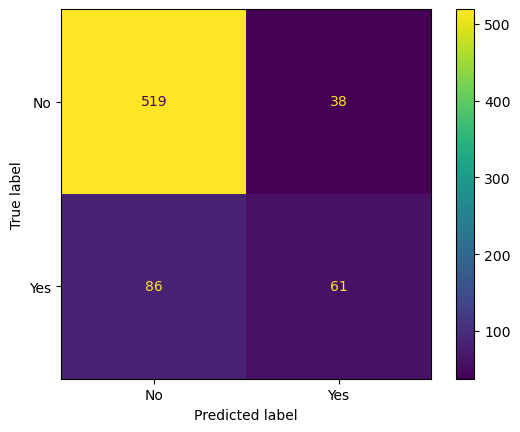

In [76]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test);

## AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
model = AdaBoostClassifier()

In [79]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [80]:
preds = model.predict(X_test)

In [81]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



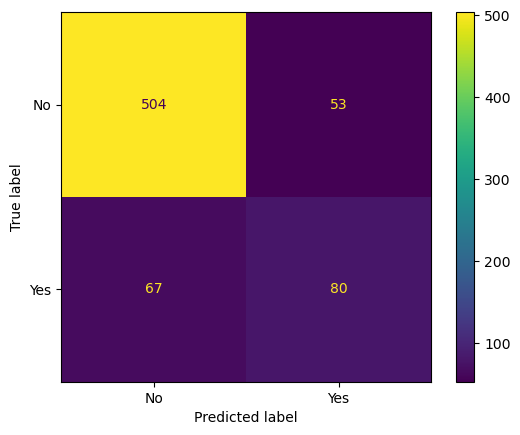

In [82]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

## GradientBoost

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
model = GradientBoostingClassifier()

In [85]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [86]:
pred = model.predict(X_test)

In [87]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



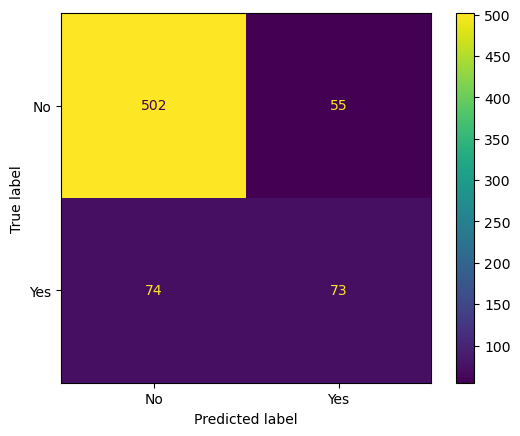

In [88]:
ConfusionMatrixDisplay.from_estimator(model,X_test, y_test);

## Ringkasan


**Jenis contract `Month-to-month, One year, Two year`**
* Dari 3 jenis kontrak yang tersedia, `Month-to-month` merupakan golongan yang rentan dengan `Churn` atau beralih ke perusahaan lain mungkin kelompok ini cenderung masih coba-coba untuk mendapatkan layanan terbaik dan cocok dengan kebutuhannya, sedangkan jenis contract  `One year dan Two year` yang menjadi faktor `Churn` atau beralih yaitu tentang `TotalCharges` atau jumlah total tagihan yang terlalu mahal. 


**Saran untuk 3 jenis contract**
* Contract `Month-to-month` kita harus memberikan vocer apabila contractnya sudah mendekati masa tenggang sehingga pelanggan beralih fokus karena telah mendapatkan vocer atau potongan tagihan bulannya, 
* Contract `One year dan Two year` karena golongan ini adalah golongan yang paling loyal, dari perusahan memberikan biaya bulanan yang murah, lebih baik merawat pelanggan dengan kontrak panjang dan loyal ketimbang memberikan ke golongan contract `Month-to-month` yan cenderung mudah beralih


